Google Stock Price with LSTM
===
Kenny Hsieh, 2018/4/1

## Data Loading

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

## Preprocessing with Price in MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Prepare the Train Dataset to 60 timestamps and 1 output

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## 2. Building LSTM Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model_lstm = Sequential()

#1st LSTM
model_lstm.add(LSTM(units = 50,
                    input_shape = (X_train.shape[1], 1),
                    return_sequences = True))
model_lstm.add(Dropout(0.2))

# 2nd LSTM
model_lstm.add(LSTM(units = 100,
                    return_sequences = True))
model_lstm.add(Dropout(0.2))

# 3rd LSTM
model_lstm.add(LSTM(units = 50,
                    return_sequences = True))
model_lstm.add(Dropout(0.2))

# 4th LSTM
model_lstm.add(LSTM(units = 50))
model_lstm.add(Dropout(0.2))

# Final Layer : output one number
model_lstm.add(Dense(units = 1))
               
# Compile then fit the model
model_lstm.compile(optimizer = 'adam',
                   loss = 'mean_squared_error')
model_lstm.fit(X_train, y_train, 
               epochs = 100, batch_size = 32)

Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0475
Epoch 2/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0062
Epoch 5/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045
Epoch 8/100
 352/1198 [=======>......................] - ETA: 14s - loss: 0.0043

1198/1198 [==============================] - 21s 18ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0040
Epoch 13/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0037
Epoch 14/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0034
Epoch 15/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0041

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0038
Epoch 16/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0033
Epoch 17/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0036
Epoch 18/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0037
Epoch 19/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0032
Epoch 20/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0033
Epoch 21/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0033
Epoch 22/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0045

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0037
Epoch 23/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0031
Epoch 24/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0034
Epoch 25/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0035
Epoch 26/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0029
Epoch 27/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0030
Epoch 28/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0026
Epoch 29/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0034

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0030
Epoch 30/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0027
Epoch 31/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0026
Epoch 32/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0029
Epoch 33/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0026
Epoch 34/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0028
Epoch 35/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0027
Epoch 36/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0026

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0027
Epoch 37/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0026
Epoch 38/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0026
Epoch 39/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0026
Epoch 40/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0028
Epoch 41/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0027
Epoch 42/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0025
Epoch 43/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0024

1198/1198 [==============================] - 21s 18ms/step - loss: 0.0026
Epoch 44/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0022
Epoch 45/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0024
Epoch 46/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0024
Epoch 47/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0023
Epoch 48/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0022
Epoch 49/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0024
Epoch 50/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0024

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0025
Epoch 51/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0024
Epoch 52/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0022
Epoch 53/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0022
Epoch 54/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0024
Epoch 55/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0021
Epoch 56/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0021
Epoch 57/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0020

1198/1198 [==============================] - 21s 18ms/step - loss: 0.0021
Epoch 58/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0019
Epoch 59/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0018
Epoch 60/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0019
Epoch 61/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0021
Epoch 62/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0018
Epoch 63/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0020
Epoch 64/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0020

1198/1198 [==============================] - 21s 18ms/step - loss: 0.0022
Epoch 65/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0019
Epoch 66/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0018
Epoch 67/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0022
Epoch 68/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0021
Epoch 69/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0018
Epoch 70/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0017
Epoch 71/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0017

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0017
Epoch 72/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0018
Epoch 73/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0018
Epoch 74/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0017
Epoch 75/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0016
Epoch 76/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0019
Epoch 77/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0016
Epoch 78/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0018

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0018
Epoch 79/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0018
Epoch 80/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0015
Epoch 81/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0016
Epoch 82/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0014
Epoch 83/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0014
Epoch 84/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0016
Epoch 85/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0018

1198/1198 [==============================] - 21s 18ms/step - loss: 0.0015
Epoch 86/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0013
Epoch 87/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0014
Epoch 88/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0016
Epoch 89/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0015
Epoch 90/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0014
Epoch 91/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0015
Epoch 92/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0015

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0013
Epoch 93/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0019
Epoch 94/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0012
Epoch 99/100
 512/1198 [===========>..................] - ETA: 12s - loss: 0.0013

1198/1198 [==============================] - 21s 18ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0014


## 3. Make the prediction

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Creating a data structure with 60 timesteps
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
def rmse(actual, predict):
  return sqrt(mean_squared_error(actual, predict))

print("LSTM RMSE score : %s" %rmse(real_stock_price, predicted_stock_price))

LSTM RMSE score : 12.57165273780844


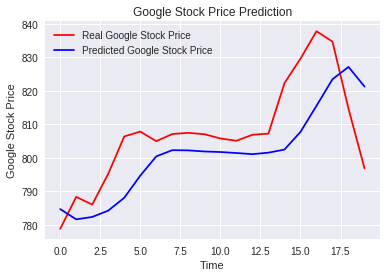

In [11]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()